<a href="https://colab.research.google.com/github/gilangarisptr/NLP/blob/main/Chapter2_A_Quick_Tour_of_Traditional_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traditional NLP** 

## **Corpora, Tokens, and Types**

semua metode NLP, baik itu klasik ataupun modern membutuhkan dataset *text* , biasanya dataset text ini disebut sebagai *corpus*. *corpus* biasanya berisi sekumpulan kata atau kalimat (bisa dalam bentuk ASCII atau UTF-8). kalimat tersebut biasa disebut sebagai **metadata**. seperti yang kita tahu bahwa kata itu adalah kumpulan huruf. kumpulan huruf bisa memiliki arti atau makna dan tidak memiliki makna. kumpulan huruf ini dalam NLP biasanya disebut **token**. perhatikan ilustrasi gambar di bawah ini.  

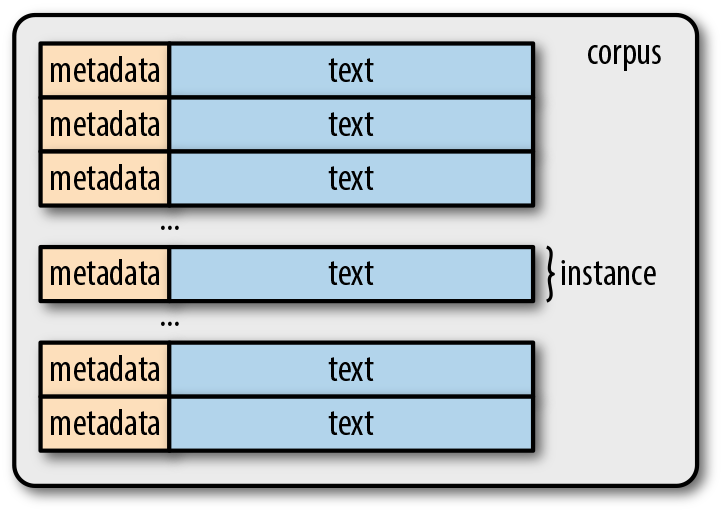

## Tokenization

In [ ]:
import spacy

In [ ]:
# jika tidak menggunakan library spacy maka ketika dilakukan perulangan terhadap suatu kalimat
# akan direturn dalam bentuk karakter

print([str(token) for token in (text.lower())])

['m', 'a', 'r', 'y', ',', ' ', 'd', 'o', 'n', "'", 't', ' ', 's', 'l', 'a', 'p', ' ', 't', 'h', 'e', ' ', 'g', 'r', 'e', 'e', 'n', ' ', 'w', 'i', 't', 'c', 'h']


In [ ]:
# nah kedua kita menggunakan library spacy untuk melakukan tokenisasi
# berikut adalah contoh tokenisasi bahawa inggris

nlp = spacy.load('en')
text = "Mary, don't slap the green witch"

print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


In [ ]:
# berikut adalah contoh tokenisasi bahasa indonesia

nlp = spacy.blank('id')
text = 'Mary, jangan menampar penyihir hijau itu!'

print([str(token) for token in nlp(text.lower())])


# nah mantapp kan? wkwkwk

['mary', ',', 'jangan', 'menampar', 'penyihir', 'hijau', 'itu', '!']


In [ ]:
# tapi bagaimana misalnya kalau kita menambahkan emoticon? apakah bisa?

nlp = spacy.load('en')
text = u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:)"

print([str(token) for token in nlp(text.lower())])

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#', 'makeamoviecold@midnight', ':', ')']


In [ ]:
# selain menggunakan library spacy, kita juga bisa melakukan tokenisasi menggunakan library nltk

from nltk.tokenize import TweetTokenizer

tweet = u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:) "

tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':)']


## Unigrams, Bigrams, Trigrams, ... , N-grams

bagaimana misalkan kita ingin mengumpulkan beberapa kata? nah n-grams adalah salah satu pendekatan yang bisa dilakukan untuk mereturn beberapa kata

In [ ]:
def n_grams(text, n):
  '''
  takes tokens ot text, return a list of n-grams
  '''
  return [text[i:i+n] for i in range(len(text)-n+1)]

cleaned = [str(token) for token in nlp(text.lower())]
print(n_grams(cleaned, 3))

[['snow', 'white', 'and'], ['white', 'and', 'the'], ['and', 'the', 'seven'], ['the', 'seven', 'degrees'], ['seven', 'degrees', '#'], ['degrees', '#', 'makeamoviecold@midnight'], ['#', 'makeamoviecold@midnight', ':'], ['makeamoviecold@midnight', ':', ')']]


## Lemmas and Stems

gampangnya *lemmas* adalah induk kata (tanpa imbuhan). cara untuk mencari induk kata dari suatu kata maka disebut *lemmatization*. contoh dalam bahasa inggris : fly = flew, flies, flown, flowing, dll. 

In [ ]:
# contoh lemmatization

import spacy
nlp = spacy.load('en')
doc = nlp(u"he was running late")

for token in doc:
  print('{} --> {}'.format(token, token.lemma_) )

he --> -PRON-
was --> be
running --> run
late --> late


In [ ]:
from spacy.lang.id import 

ImportError: ignored

In [ ]:

import random
lemma_as_list = list(LOOKUP.items())
samples = random.choices(lemma_as_list, k=20)
for k, v in samples:
    print(f'{k}: {v}')

ImportError: ignored

In [ ]:
# contoh lemmatization bahasa indonesia
nlp = spacy.blank('id')
doc = nlp('tertidur tidur tercyduk')
for token in doc:
    ori = token.text
    lemma = token.lemma_  # token.lemma is integer index
    print(ori, lemma)

tertidur tertidur
tidur tidur
tercyduk tercyduk


In [1]:
# preprocessing text using stanza nlp stanford
# install library stanza

!pip install stanza

     |████████████████████████████████| 286kB 17.4MB/s 


In [2]:
import stanza

In [3]:
# Download an English model into the default directory
print("Downloading English model...")
stanza.download('en')

# Download an Indonesian model into the default directory
print("Downloading Indonesian model... ")
stanza.download('id')

2021-02-07 03:03:37 INFO: Downloading default packages for language: en (English)...


2021-02-07 03:04:46 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-02-07 03:04:46 INFO: Downloading default packages for language: id (Indonesian)...


2021-02-07 03:05:13 INFO: Finished downloading models and saved to /root/stanza_resources.


In [4]:
# Build an English pipeline, with all processors by default
print("Building an English pipeline...")
en_nlp = stanza.Pipeline('en')

# Build a Chinese pipeline, with customized processor list and no logging, and force it to use CPU
print("Building a Indonesia pipeline...")
id_nlp = stanza.Pipeline('id', processors='tokenize,lemma,pos,depparse', verbose=False, use_gpu=False)

2021-02-07 03:08:43 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-02-07 03:08:43 INFO: Use device: gpu
2021-02-07 03:08:43 INFO: Loading: tokenize


Building an English pipeline...


2021-02-07 03:08:53 INFO: Loading: pos
2021-02-07 03:08:53 INFO: Loading: lemma
2021-02-07 03:08:53 INFO: Loading: depparse
2021-02-07 03:08:54 INFO: Loading: sentiment
2021-02-07 03:08:54 INFO: Loading: ner
2021-02-07 03:08:55 INFO: Done loading processors!


Building a Indonesia pipeline...


In [5]:
# Processing English text
en_doc = en_nlp("Barack Obama was born in Hawaii.  He was elected president in 2008.")
print(type(en_doc))

# Processing Indonesia text
id_doc = id_nlp("Tak ada penjagaan di check point ganjil genap di Tugu Kujang, Kota Bogor. Sehingga, pelanggar ganjil genap di Kota Bogor tidak mendapat sanksi putar balik atau diberhentikan.")
print(type(id_doc))

<class 'stanza.models.common.doc.Document'>
<class 'stanza.models.common.doc.Document'>


In [6]:
for i, sent in enumerate(en_doc.sentences):
    print("[Sentence {}]".format(i+1))
    for word in sent.words:
        print("{:12s}\t{:12s}\t{:6s}\t{:d}\t{:12s}".format(\
              word.text, word.lemma, word.pos, word.head, word.deprel))
    print("")

[Sentence 1]
Barack      	Barack      	PROPN 	4	nsubj:pass  
Obama       	Obama       	PROPN 	1	flat        
was         	be          	AUX   	4	aux:pass    
born        	bear        	VERB  	0	root        
in          	in          	ADP   	6	case        
Hawaii      	Hawaii      	PROPN 	4	obl         
.           	.           	PUNCT 	4	punct       

[Sentence 2]
He          	he          	PRON  	3	nsubj:pass  
was         	be          	AUX   	3	aux:pass    
elected     	elect       	VERB  	0	root        
president   	president   	NOUN  	3	xcomp       
in          	in          	ADP   	6	case        
2008        	2008        	NUM   	3	obl         
.           	.           	PUNCT 	3	punct       



In [7]:
for i, sent in enumerate(id_doc.sentences):
    print("[Sentence {}]".format(i+1))
    for word in sent.words:
        print("{:12s}\t{:12s}\t{:6s}\t{:d}\t{:12s}".format(\
              word.text, word.lemma, word.pos, word.head, word.deprel))
    print("")

[Sentence 1]
Tak         	tak         	PART  	2	advmod      
ada         	ada         	VERB  	0	root        
penjagaan   	penjagaan   	NOUN  	2	obj         
di          	di          	ADP   	5	case        
check       	check       	NOUN  	3	nmod        
point       	point       	NOUN  	5	compound    
ganjil      	ganjil      	NOUN  	6	compound    
genap       	genap       	NUM   	7	nummod      
di          	di          	ADP   	10	case        
Tugu        	tugu        	PROPN 	5	nmod        
Kujang      	kujang      	PROPN 	10	flat        
,           	,           	PUNCT 	10	punct       
Kota        	kota        	PROPN 	10	appos       
Bogor       	bogor       	PROPN 	13	flat        
.           	.           	PUNCT 	2	punct       

[Sentence 2]
Sehingga    	sehingga    	SCONJ 	10	mark        
,           	,           	PUNCT 	1	punct       
pelanggar   	penlanggar  	NOUN  	10	nsubj       
ganjil      	ganjil      	NOUN  	3	compound    
genap       	genap       	NUM   	4	nummod      
di    

## Categorizing Sentence and Documents

kategori atau klasifikasi dokumen adalah salah satu penerapan dari NLP. TF dan TF-IDF adalah salah satu metode untuk mengklasifikasikan atau mengkategorikan text, kalimat, dan dokumen. beberapa contoh permasalahan yang biasanya diatasi adalah menentukan topik dari suatu dokumen, memprediksikan sentiment dari review konsumen, filter email yang gak berguna, mengklasifikasikan bahasa yang digunakan. 

### Categorizing : Words as POS (Part-of-Speech) Tagging

salah satu penerapan yang paling umum dalam mengkategorikan suatu kata adalah dengan menggunakan metode POS tagging. yaa yang paling simple POS tagging ini bisa dijalankan dengan menggunakan library *spacy* dan *stanza*

In [8]:
# contoh penerapan POS tagging menggunakan spacy

import spacy

nlp = spacy.load("en")
doc = nlp("Will you marry me?")
for token in doc:
  print('{} - {}'.format(token, token.pos_))

Will - VERB
you - PRON
marry - VERB
me - PRON
? - PUNCT


In [10]:
indo_nlp = spacy.blank("id")
dok = indo_nlp("apakah kamu mau menjadi kekasihku?")
for token in dok:
  print('{} - {}'.format(token, token.pos_))

# hasilnya tidak sesuai harapan wkwkwk

apakah - 
kamu - 
mau - 
menjadi - 
kekasihku - 
? - 


In [11]:
# contoh pos tagging menggunakan library stanza

!pip install stanza

import stanza

In [12]:
# Download an Indonesian model into the default directory
print("Downloading Indonesian model... ")
stanza.download('id')

In [14]:
# Build an Indonesia pipeline, with all processors by default
print("Building an Indonesia pipeline...")
id_nlp = stanza.Pipeline('id')

Building an Indonesia pipeline...


In [17]:
indo_dok = id_nlp("apakah kamu mau menjadi kekasihku?")

for i,sents in enumerate(indo_dok.sentences):
  print("sentence : {}".format((i+1)))
  for token in sents.words:
    print("{} - {}".format(token.text, token.pos))

# nah kalau ini hasilnya lebih bagus wkwkwk

sentence : 1
apakah - ADV
kamu - PRON
mau - ADV
menjadi - VERB
kekasihku - NOUN
? - PUNCT


# Kesimpulan

di materi kali ini kta belajar beberapa terminologi dasar yang dipakai di NLP. pemahaman dasar tentang NLP ini diperlukan untuk memahami lebih dalam lagi tentang NLP terutama di chapter selanjutnya. oke sekian semoga bermanfaat terimakasih..